# MovieLens

In [3]:
import numpy as np
import pandas as pd
import os

In [4]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/UCB Files/2022 Fall/IEOR 142/Lab/Week12')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Data Loading

In [5]:
movie_lens_train=pd.read_csv("movie_lens_train.csv", index_col = 0)
movie_lens_valA=pd.read_csv("movie_lens_valA.csv", index_col = 0)
movie_lens_valB=pd.read_csv("movie_lens_valB.csv", index_col = 0)
movie_lens_test=pd.read_csv("movie_lens_test.csv", index_col = 0)

In [6]:
movie_lens_train.shape
movie_lens_train.head()

,userID,movieID,AgeRange,Jobacademic_educator,Jobartist,Jobclerical_admin,Jobcollege_grad_student,Jobcustomer_service,Jobdoctor_health_care,Jobexecutive_managerial,...,Romance,Sci_Fi,Thriller,War,Western,rating,wday,mon,year,hour
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,5,6,1,2001,15
1,1,48,1,0,0,0,0,0,0,0,...,1,0,0,0,0,5,6,1,2001,15
3,1,254,1,0,0,0,0,0,0,0,...,0,1,0,0,0,4,0,12,2000,14
4,1,514,1,0,0,0,0,0,0,0,...,0,0,0,1,0,5,6,1,2001,15
5,1,518,1,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,12,2000,14


In [7]:
movie_lens_valA.shape
movie_lens_valA.head()

,userID,movieID,AgeRange,Jobacademic_educator,Jobartist,Jobclerical_admin,Jobcollege_grad_student,Jobcustomer_service,Jobdoctor_health_care,Jobexecutive_managerial,...,Romance,Sci_Fi,Thriller,War,Western,rating,wday,mon,year,hour
2077,1,145,1,0,0,0,0,0,0,0,...,0,0,0,0,0,5,0,12,2000,14
8688,1,594,1,0,0,0,0,0,0,0,...,0,0,1,0,0,4,0,12,2000,14
12511,1,964,1,0,0,0,0,0,0,0,...,0,0,0,0,0,5,0,12,2000,14
6245,2,444,56,0,0,0,0,0,0,0,...,0,0,1,0,0,4,0,12,2000,13
13510,2,1019,56,0,0,0,0,0,0,0,...,0,0,0,1,0,2,0,12,2000,13


### 1.1 Data Preprocessing (Ignore features for now, and only look at ratings)

The four blocks of code below use pivot_table to reshape the data and only look at the rating variable. This function serves the same purpose as the pivot table in Microsoft Excel. We also add back columns with no observations in the validation and test set.

In [8]:
movie_lens_train.sort_index()
movie_lens_train_df = movie_lens_train.pivot_table(index="userID", columns = "movieID", values = "rating", dropna=False)
movie_lens_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6040 entries, 1 to 6040
Columns: 3689 entries, 1 to 3706
dtypes: float64(3689)
memory usage: 170.0 MB


In [9]:
movie_lens_valA.sort_index()
movie_lens_valA_df = movie_lens_valA.pivot_table(index="userID", columns = "movieID", values = "rating", dropna=False)
#movie_lens_valA_df.info()
valA_extra_columns = list(set(range(1,3706+1)) - set(movie_lens_valA_df.columns))
#print('# of missing columns: %s; # of missing movies: %s' % (3706-movie_lens_valA_df.shape[1], len(valA_extra_columns)))
movie_lens_valA_df[valA_extra_columns]=np.nan
movie_lens_valA_df=movie_lens_valA_df[movie_lens_train_df.columns]
print(movie_lens_valA_df.shape)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3645: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = value


(6040, 3689)


In [10]:
movie_lens_valB.sort_index()
movie_lens_valB_df = movie_lens_valB.pivot_table(index="userID", columns = "movieID", values = "rating", dropna=False)
valB_extra_columns = list(set(range(1,3706+1)) - set(movie_lens_valB_df.columns))
movie_lens_valB_df[valB_extra_columns]=np.nan
movie_lens_valB_df = movie_lens_valB_df[movie_lens_train_df.columns]
movie_lens_valB_df = movie_lens_train_df[[]].join(movie_lens_valB_df, how='outer')
print(movie_lens_valB_df.shape)

(6040, 3689)


In [11]:
movie_lens_test.sort_index()
movie_lens_test_df = movie_lens_test.pivot_table(index="userID", columns = "movieID", values = "rating", dropna=False)
test_extra_columns = list(set(range(1,3706+1)) - set(movie_lens_test_df.columns))
movie_lens_test_df[test_extra_columns]=np.nan
movie_lens_test_df = movie_lens_test_df[movie_lens_train_df.columns]
movie_lens_test_df = movie_lens_train_df[[]].join(movie_lens_test_df, how='outer')
print(movie_lens_test_df.shape)

(6040, 3689)


In [12]:
movie_lens_train_mat = movie_lens_train_df.to_numpy()
movie_lens_valA_mat = movie_lens_valA_df.to_numpy()
movie_lens_valB_mat = movie_lens_valB_df.to_numpy()
movie_lens_test_mat = movie_lens_test_df.to_numpy()

In [13]:
movie_lens_valA_mask = ~np.isnan(movie_lens_valA_mat)
print(np.sum(movie_lens_valA_mask))
movie_lens_valB_mask = ~np.isnan(movie_lens_valB_mat)
print(np.sum(movie_lens_valB_mask))
movie_lens_test_mask = ~np.isnan(movie_lens_test_mat)
print(np.sum(movie_lens_test_mask))

49923
49929
49920


## 2. Basic Analysis (without using features)

### 2.1 BiScaler and SoftInpute

In [15]:
! pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 10.5 MB/s 
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29898 sha256=04166a13e7978de4e36684a1b1fe0c14ac5d230e8217ebf6356d4869d441ab10
  Stored in directory: /root/.cache/pip/wheels/e3/04/06/a1a7d89ef4e631ce6268ea2d8cde04f7290651c1ff1025ce68
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=1d7e1e8c54477850e9ccc55679abe0c77d41b9faa9fdf0833ab36326e3373a56
  Stored in directory: /root/.cache/pip/wheels/72/21/a8/a045cacd9838abd5643f6bfa852c0796a99d6b1494760494e0
Successfully built fancyimpute knnimpute


In [16]:
from fancyimpute import BiScaler
from fancyimpute import SoftImpute
movie_lens_biscaler = BiScaler(scale_rows=False, scale_columns=False, verbose=True)
movie_lens_train_mat_centered = movie_lens_biscaler.fit_transform(movie_lens_train_mat)
movie_lens_soft_imputer = SoftImpute(max_rank=5, verbose=True)
movie_lens_centered_filled = movie_lens_soft_imputer.fit_transform(movie_lens_train_mat_centered)

[BiScaler] Initial log residual value = 11.731158
[BiScaler] Iter 1: log residual = -0.042179, log improvement ratio=11.773338
[BiScaler] Iter 2: log residual = -3.468599, log improvement ratio=3.426419
[BiScaler] Iter 3: log residual = -6.494014, log improvement ratio=3.025416
[BiScaler] Iter 4: log residual = -9.393002, log improvement ratio=2.898988
[BiScaler] Iter 5: log residual = -12.244456, log improvement ratio=2.851454
[BiScaler] Iter 6: log residual = -15.078084, log improvement ratio=2.833628
[BiScaler] Iter 7: log residual = -17.904943, log improvement ratio=2.826859
[BiScaler] Iter 8: log residual = -20.729171, log improvement ratio=2.824228
[BiScaler] Iter 9: log residual = -23.552354, log improvement ratio=2.823183
[BiScaler] Iter 10: log residual = -26.375126, log improvement ratio=2.822772
[BiScaler] Iter 11: log residual = -29.197748, log improvement ratio=2.822623
[BiScaler] Iter 12: log residual = -32.020335, log improvement ratio=2.822586
[BiScaler] Iter 13: log re

### 2.2 Test Set Performance

In [ ]:
movie_lens_filled = movie_lens_biscaler.inverse_transform(movie_lens_centered_filled)
movie_lens_filled = np.clip(movie_lens_filled, 1, 5)
movie_lens_filled

array([[5.        , 3.35221644, 3.43797385, ..., 3.94470789, 4.01880903,
        4.14117788],
       [4.31405728, 3.3003264 , 3.21360224, ..., 3.77833019, 3.80309852,
        4.06486791],
       [3.81748359, 3.35193523, 3.43683524, ..., 3.75999194, 4.02286732,
        4.17360692],
       ...,
       [3.87403307, 3.2674387 , 3.08472871, ..., 3.82676769, 3.97123078,
        4.22070964],
       [4.07072726, 3.19116268, 3.03394783, ..., 3.59091838, 3.73126438,
        3.83351641],
       [3.        , 2.6511453 , 2.67685432, ..., 3.57280587, 3.63996318,
        3.73144059]])

In [ ]:
def masked_mae(X_true, X_pred, mask):
    masked_diff = X_true[mask] - X_pred[mask]
    return np.mean(np.abs(masked_diff))

def masked_mse(X_true, X_pred, mask):
    masked_diff = X_true[mask] - X_pred[mask]
    return np.mean(masked_diff ** 2)

def OSR2(mse_model, mse_baseline):
    return 1 - mse_model/mse_baseline

In [ ]:
movie_lens_test_mae = masked_mae(movie_lens_test_mat, movie_lens_filled, movie_lens_test_mask)

print("MAE %s " % (movie_lens_test_mae/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

movie_lens_test_mse = masked_mse(movie_lens_test_mat, movie_lens_filled, movie_lens_test_mask)

print("RMSE %s " % (np.sqrt(movie_lens_test_mse)/4))

baseline_pred = np.mean(movie_lens_train)[2]
baseline_model = baseline_pred*np.ones((6040, 3689))
baseline_mse = masked_mse(movie_lens_test_mat, baseline_model, movie_lens_test_mask)

print("OSR2 %s " % OSR2(movie_lens_test_mse, baseline_mse))

MAE 0.16897908063053707 
RMSE 0.21675693208311203 
OSR2 0.9989030317546583 


### 2.3 Cross Validation for max_rank

Warning: The cross validation below took about 30 minutes to run on my computer.

In [ ]:
movie_lens_valA_mae_lst = []
for i in range(20):
    param_cv = i+1
    movie_lens_soft_imputer_cv = SoftImpute(max_rank=param_cv, verbose=False)
    movie_lens_centered_filled_cv = movie_lens_soft_imputer_cv.fit_transform(movie_lens_train_mat_centered)
    movie_lens_filled_cv = movie_lens_biscaler.inverse_transform(movie_lens_centered_filled_cv)
    movie_lens_filled_cv = np.clip(movie_lens_filled_cv, 1, 5)
    movie_lens_valA_mae_cv = masked_mae(movie_lens_valA_mat, movie_lens_filled_cv, movie_lens_valA_mask)
    movie_lens_valA_mae_lst.append(movie_lens_valA_mae_cv)
    print('iter %s - Validation MAE %s' % (param_cv, movie_lens_valA_mae_cv))

iter 1 - Validation MAE 0.6992973255039637
iter 2 - Validation MAE 0.692595515832482
iter 3 - Validation MAE 0.684974585008146
iter 4 - Validation MAE 0.6796564668360647
iter 5 - Validation MAE 0.6772651008322097
iter 6 - Validation MAE 0.6739398475264288
iter 7 - Validation MAE 0.6715908074749444
iter 8 - Validation MAE 0.6713668023279918
iter 9 - Validation MAE 0.6710921928997017
iter 10 - Validation MAE 0.6705733564625969
iter 11 - Validation MAE 0.6722053582500204
iter 12 - Validation MAE 0.6731628306982579
iter 13 - Validation MAE 0.6732247556813507
iter 14 - Validation MAE 0.6740416943026314
iter 15 - Validation MAE 0.6759129450007019
iter 16 - Validation MAE 0.6792732521876269
iter 17 - Validation MAE 0.677286158284986
iter 18 - Validation MAE 0.6808451080292933
iter 19 - Validation MAE 0.6821287742516068
iter 20 - Validation MAE 0.6831172213585346


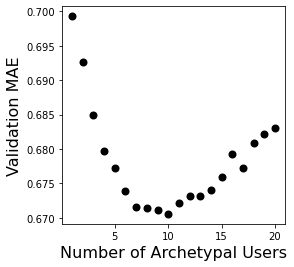

In [ ]:
import matplotlib.pyplot as plt
x = range(1,21)
y = movie_lens_valA_mae_lst
plt.figure(figsize=(4, 4))
plt.scatter(x, y, linewidth=2, color='black')
plt.xlabel('Number of Archetypal Users', fontsize=16)
plt.ylabel('Validation MAE', fontsize=16)
plt.show()

## 3. Model Blending/Stacking

### 3.1 Three Models

1. Collaborative Filtering (Fit and predict on the validation B set)

In [ ]:
movie_lens_soft_imputer = SoftImpute(max_rank=10, verbose=False) #use the best 
movie_lens_centered_filled = movie_lens_soft_imputer.fit_transform(movie_lens_train_mat_centered)
movie_lens_filled_matrix = movie_lens_biscaler.inverse_transform(movie_lens_centered_filled)
movie_lens_filled_matrix = np.clip(movie_lens_filled_matrix, 1, 5)

In [ ]:
val_mae_cf = masked_mae(movie_lens_valB_mat, movie_lens_filled_matrix, movie_lens_valB_mask)
print("MAE %s " % (val_mae_cf/4)) 
#Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

val_mse_cf = masked_mse(movie_lens_valB_mat, movie_lens_filled_matrix, movie_lens_valB_mask)
print("RMSE %s " % (np.sqrt(val_mse_cf)/4))

baseline_pred = np.mean(movie_lens_train_df)[2]
baseline_model = baseline_pred*np.ones((6040, 3689))
baseline_mse = masked_mse(movie_lens_valB_mat, baseline_model, movie_lens_valB_mask)

print("OSR2 %s " % OSR2(val_mse_cf, baseline_mse))

MAE 0.16651323530081144 
RMSE 0.2149406672588672 
OSR2 0.46351194851189026 


In [ ]:
val_pred_cf = movie_lens_filled_matrix[movie_lens_valB_mask]

blend_valB_df = movie_lens_valB.reset_index()[['userID','movieID','rating']]

blend_valB_df['val_pred_cf']=val_pred_cf
blend_valB_df

,userID,movieID,rating,val_pred_cf
0,1,1026,4,4.594879
1,1,2206,4,4.192243
2,1,2600,5,4.254051
3,2,310,5,5.000000
4,2,1624,3,2.956652
...,...,...,...,...
49924,6040,2210,1,1.935497
49925,6040,2666,4,3.208487
49926,6040,2858,3,3.060928
49927,6040,3005,5,4.242000


2. Linear Regression

In [ ]:
# Some extra data preprocessing, converting numbers to categorical variables
movie_lens_train['year'] = movie_lens_train.year.astype('category')
movie_lens_train['AgeRange'] = movie_lens_train.AgeRange.astype('category')
movie_lens_valA['year'] = movie_lens_valA.year.astype('category')
movie_lens_valA['AgeRange'] = movie_lens_valA.AgeRange.astype('category')
movie_lens_test['year'] = movie_lens_test.year.astype('category')
movie_lens_test['AgeRange'] = movie_lens_test.AgeRange.astype('category')
movie_lens_test

,userID,movieID,AgeRange,Jobacademic_educator,Jobartist,Jobclerical_admin,Jobcollege_grad_student,Jobcustomer_service,Jobdoctor_health_care,Jobexecutive_managerial,...,Romance,Sci_Fi,Thriller,War,Western,rating,wday,mon,year,hour
9481,1,709,1,0,0,0,0,0,0,0,...,0,0,1,0,0,3,6,1,2001,15
12228,1,958,1,0,0,0,0,0,0,0,...,0,0,0,0,0,5,0,12,2000,14
26429,1,1782,1,0,0,0,0,0,0,0,...,0,0,0,0,0,5,0,12,2000,14
3502,2,259,56,0,0,0,0,0,0,0,...,1,0,0,0,0,4,0,12,2000,13
8831,2,627,56,0,0,0,0,0,0,0,...,0,0,0,1,0,3,0,12,2000,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29785,6040,1970,25,0,0,0,0,0,1,0,...,0,0,0,0,0,3,2,4,2000,19
36751,6040,2512,25,0,0,0,0,0,1,0,...,0,0,0,0,0,2,2,4,2000,19
37229,6040,2547,25,0,0,0,0,0,1,0,...,0,0,0,0,0,1,2,4,2000,19
39130,6040,2710,25,0,0,0,0,0,1,0,...,0,0,1,0,0,4,5,8,2001,7


In [ ]:
depedent_var = movie_lens_train.columns.difference(["rating","userID","movieID"]) 
#  df.columns.difference() gives you complement of the values that you provide as argument.
print(len(depedent_var))
depedent_var = "+".join(depedent_var)
depedent_var

50


'Action+Adventure+AgeRange+Animation+Children_s+Comedy+Crime+Documentary+Drama+Fantasy+Film_Noir+Horror+JobK_12_student+Jobacademic_educator+Jobartist+Jobclerical_admin+Jobcollege_grad_student+Jobcustomer_service+Jobdoctor_health_care+Jobexecutive_managerial+Jobfarmer+Jobhomemaker+Joblawyer+Jobprogrammer+Jobretired+Jobsales_marketing+Jobscientist+Jobself_employed+Jobtechnician_engineer+Jobtradesman_craftsman+Jobunemployed+Jobwriter+Male+MedianIncome+Musical+Mystery+RegionMidwest+RegionNortheast+RegionSouth+RegionWest+Romance+Sci_Fi+Thriller+Urban+War+Western+hour+mon+wday+year'

In [ ]:
import statsmodels.formula.api as smf
my_formula = "rating ~" + depedent_var
movie_lens_ols = smf.ols(formula=my_formula, data=movie_lens_train)
res = movie_lens_ols.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     643.3
Date:                Mon, 15 Nov 2021   Prob (F-statistic):               0.00
Time:                        11:09:19   Log-Likelihood:            -1.2829e+06
No. Observations:              850416   AIC:                         2.566e+06
Df Residuals:                  850358   BIC:                         2.567e+06
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [ ]:
val_pred_ols = res.predict(movie_lens_valB)
blend_valB_df['val_pred_ols']=val_pred_ols
blend_valB_df

,userID,movieID,rating,val_pred_cf,val_pred_ols
0,1,1026,4,4.594879,3.601795
1,1,2206,4,4.192243,3.628043
2,1,2600,5,4.254051,3.582563
3,2,310,5,5.000000,3.445169
4,2,1624,3,2.956652,3.552689
...,...,...,...,...,...
49924,6040,2210,1,1.935497,3.884892
49925,6040,2666,4,3.208487,3.907907
49926,6040,2858,3,3.060928,3.797508
49927,6040,3005,5,4.242000,3.827531


In [ ]:
val_mae_ols = np.mean(np.abs(movie_lens_valB_mat[movie_lens_valB_mask] - val_pred_ols))
print("MAE %s " % (val_mae_ols/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

val_mse_ols = np.mean((movie_lens_valB_mat[movie_lens_valB_mask] - val_pred_ols)**2)
print("RMSE %s " % (np.sqrt(val_mse_ols)/4))

print("OSR2 %s " % OSR2(val_mse_ols, baseline_mse))

MAE 0.22341250177361197 
RMSE 0.27233004205114564 
OSR2 0.13878026214239647 


3. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X_train = movie_lens_train.drop(columns = ["userID","movieID","rating"])
y_train = movie_lens_train["rating"]
rf = RandomForestRegressor(max_features=5, min_samples_leaf=5, 
                           n_estimators = 500, random_state=88, verbose=2)
rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 500


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500


building tree 334 of 500
building tree 335 of 500
building tree 336 of 500
building tree 337 of 500
building tree 338 of 500
building tree 339 of 500
building tree 340 of 500
building tree 341 of 500
building tree 342 of 500
building tree 343 of 500
building tree 344 of 500
building tree 345 of 500
building tree 346 of 500
building tree 347 of 500
building tree 348 of 500
building tree 349 of 500
building tree 350 of 500
building tree 351 of 500
building tree 352 of 500
building tree 353 of 500
building tree 354 of 500
building tree 355 of 500
building tree 356 of 500
building tree 357 of 500
building tree 358 of 500
building tree 359 of 500
building tree 360 of 500
building tree 361 of 500
building tree 362 of 500
building tree 363 of 500
building tree 364 of 500
building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  7.3min finished


RandomForestRegressor(max_features=5, min_samples_leaf=5, n_estimators=500,
                      random_state=88, verbose=2)

In [ ]:
val_pred_rf=rf.predict(movie_lens_valB.drop(columns = ["userID","movieID","rating"]))

blend_valB_df['val_pred_rf']=val_pred_rf
blend_valB_df

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    9.1s finished


,userID,movieID,rating,val_pred_cf,val_pred_ols,val_pred_rf
0,1,1026,4,4.594879,3.601795,3.713051
1,1,2206,4,4.192243,3.628043,4.017527
2,1,2600,5,4.254051,3.582563,3.755065
3,2,310,5,5.000000,3.445169,4.025628
4,2,1624,3,2.956652,3.552689,3.459346
...,...,...,...,...,...,...
49924,6040,2210,1,1.935497,3.884892,3.126529
49925,6040,2666,4,3.208487,3.907907,3.544796
49926,6040,2858,3,3.060928,3.797508,2.745487
49927,6040,3005,5,4.242000,3.827531,3.688222


In [ ]:
val_mae_rf = np.mean(np.abs(movie_lens_valB_mat[movie_lens_valB_mask] - val_pred_rf))
print("MAE %s " % (val_mae_rf/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

val_mse_rf = np.mean((movie_lens_valB_mat[movie_lens_valB_mask] - val_pred_rf)**2)
print("RMSE %s " % (np.sqrt(val_mse_rf)/4))

print("OSR2 %s " % OSR2(val_mse_rf, baseline_mse))

MAE 0.2020386130476658 
RMSE 0.25034759921939914 
OSR2 0.27220388944139307 


### 3.2 Combine three models using OLS
A linear combination of collaborate filtering, linear regression, random forest models

In [ ]:
blend_valB_df

,userID,movieID,rating,val_pred_cf,val_pred_ols,val_pred_rf
0,1,1026,4,4.594879,3.601795,3.713051
1,1,2206,4,4.192243,3.628043,4.017527
2,1,2600,5,4.254051,3.582563,3.755065
3,2,310,5,5.000000,3.445169,4.025628
4,2,1624,3,2.956652,3.552689,3.459346
...,...,...,...,...,...,...
49924,6040,2210,1,1.935497,3.884892,3.126529
49925,6040,2666,4,3.208487,3.907907,3.544796
49926,6040,2858,3,3.060928,3.797508,2.745487
49927,6040,3005,5,4.242000,3.827531,3.688222


In [ ]:
blending_ols = smf.ols(formula='rating ~ val_pred_cf+val_pred_ols+val_pred_rf -1', data=blend_valB_df)
blending_res = blending_ols.fit()
print(blending_res.summary())

                                 OLS Regression Results                                
Dep. Variable:                 rating   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                          3.059e+05
Date:                Mon, 15 Nov 2021   Prob (F-statistic):                        0.00
Time:                        11:16:49   Log-Likelihood:                         -62828.
No. Observations:               49929   AIC:                                  1.257e+05
Df Residuals:                   49926   BIC:                                  1.257e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [ ]:
val_pred_blended =blending_res.predict(blend_valB_df)
blend_valB_df['pred_blended']= val_pred_blended

blend_valB_df

,userID,movieID,rating,val_pred_cf,val_pred_ols,val_pred_rf,pred_blended
0,1,1026,4,4.594879,3.601795,3.713051,4.421722
1,1,2206,4,4.192243,3.628043,4.017527,4.168018
2,1,2600,5,4.254051,3.582563,3.755065,4.152078
3,2,310,5,5.000000,3.445169,4.025628,4.864344
4,2,1624,3,2.956652,3.552689,3.459346,2.994026
...,...,...,...,...,...,...,...
49924,6040,2210,1,1.935497,3.884892,3.126529,2.012120
49925,6040,2666,4,3.208487,3.907907,3.544796,3.184687
49926,6040,2858,3,3.060928,3.797508,2.745487,2.853358
49927,6040,3005,5,4.242000,3.827531,3.688222,4.094123


In [ ]:
val_mae_blended = np.mean(np.abs(movie_lens_valB_mat[movie_lens_valB_mask] - val_pred_blended))
print("MAE %s " % (val_mae_blended/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

val_mse_blended = np.mean((movie_lens_valB_mat[movie_lens_valB_mask] - val_pred_blended)**2)
print("RMSE %s " % (np.sqrt(val_mse_blended)/4))

print("OSR2 %s " % OSR2(val_mse_blended, baseline_mse))

MAE 0.16721851264891968 
RMSE 0.21290992205858056 
OSR2 0.4736014669509784 


### 3.3 Test set performance

In [ ]:
baseline_pred = np.mean(movie_lens_train_df)[2]
baseline_model = baseline_pred*np.ones((6040, 3689))
baseline_mse = masked_mse(movie_lens_test_mat, baseline_model, movie_lens_test_mask)
baseline_mse

1.3911598767773599

1. Collaborative Filtering

In [ ]:
test_mae_cf = masked_mae(movie_lens_test_mat, movie_lens_filled_matrix, movie_lens_test_mask)
print("Test_cf MAE  %s " % (val_mae_cf/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

test_mse_cf = masked_mse(movie_lens_test_mat, movie_lens_filled_matrix, movie_lens_test_mask)
print("Test_cf RMSE %s " % (np.sqrt(val_mse_cf)/4))

baseline_pred = np.mean(movie_lens_train_df)[2]
baseline_model = baseline_pred*np.ones((6040, 3689))
baseline_mse = masked_mse(movie_lens_test_mat, baseline_model, movie_lens_test_mask)

print("Test_cf OSR2 %s " % OSR2(val_mse_cf, baseline_mse))

Test_cf MAE  0.16651323530081144 
Test_cf RMSE 0.2149406672588672 
Test_cf OSR2 0.46865068536957755 


In [ ]:
test_pred_cf = movie_lens_filled_matrix[movie_lens_test_mask]

blend_test_df = movie_lens_test.reset_index()[['userID','movieID','rating']]

blend_test_df['test_pred_cf']=test_pred_cf
blend_test_df

,userID,movieID,rating,test_pred_cf
0,1,709,3,4.117887
1,1,958,5,4.133979
2,1,1782,5,4.656550
3,2,259,4,4.187495
4,2,627,3,3.442428
...,...,...,...,...
49915,6040,1970,3,3.557992
49916,6040,2512,2,2.543692
49917,6040,2547,1,2.344395
49918,6040,2710,4,3.986729


2. OLS

In [ ]:
test_pred_ols = res.predict(movie_lens_test)
blend_test_df['test_pred_ols']=test_pred_ols
blend_test_df

,userID,movieID,rating,test_pred_cf,test_pred_ols
0,1,709,3,4.117887,3.493743
1,1,958,5,4.133979,3.462365
2,1,1782,5,4.656550,3.462930
3,2,259,4,4.187495,3.469405
4,2,627,3,3.442428,3.473143
...,...,...,...,...,...
49915,6040,1970,3,3.557992,3.652979
49916,6040,2512,2,2.543692,3.589776
49917,6040,2547,1,2.344395,3.801960
49918,6040,2710,4,3.986729,3.656352


In [ ]:
test_mae_ols = np.mean(np.abs(movie_lens_test_mat[movie_lens_test_mask] - test_pred_ols))
print("Test_ols MAE  %s " % (test_mae_ols/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

test_mse_ols = np.mean((movie_lens_test_mat[movie_lens_test_mask] - test_pred_ols)**2)
print("Test_ols RMSE %s " % (np.sqrt(test_mse_ols)/4))

print("Test_ols OSR2 %s " % OSR2(test_mse_ols, baseline_mse))

Test_ols MAE  0.22436558807295012 
Test_ols RMSE 0.2735080459616938 
Test_ols OSR2 0.13963417197943218 


3. Random Forest

In [ ]:
test_pred_rf=rf.predict(movie_lens_test.drop(columns = ["userID","movieID","rating"]))

blend_test_df['test_pred_rf']=test_pred_rf
blend_test_df

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    6.6s finished


,userID,movieID,rating,test_pred_cf,test_pred_ols,test_pred_rf
0,1,709,3,4.117887,3.493743,4.006725
1,1,958,5,4.133979,3.462365,3.691947
2,1,1782,5,4.656550,3.462930,4.017527
3,2,259,4,4.187495,3.469405,3.829975
4,2,627,3,3.442428,3.473143,4.122907
...,...,...,...,...,...,...
49915,6040,1970,3,3.557992,3.652979,2.745487
49916,6040,2512,2,2.543692,3.589776,2.856619
49917,6040,2547,1,2.344395,3.801960,2.745487
49918,6040,2710,4,3.986729,3.656352,3.838671


In [ ]:
test_mae_rf = np.mean(np.abs(movie_lens_test_mat[movie_lens_test_mask] - test_pred_rf))
print("Test_rf MAE  %s " % (test_mae_rf/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

test_mse_rf = np.mean((movie_lens_test_mat[movie_lens_test_mask] - test_pred_rf)**2)
print("Test_rf RMSE %s " % (np.sqrt(test_mse_rf)/4))

print("Test_rf OSR2 %s " % OSR2(test_mse_rf, baseline_mse))

Test_rf MAE  0.2031747449134987 
Test_rf RMSE 0.2517443189808757 
Test_rf OSR2 0.27110948845414506 


4. Blending 

In [ ]:
blend_test_temp = blend_test_df.rename(columns={"test_pred_cf":"val_pred_cf","test_pred_ols":"val_pred_ols","test_pred_rf":"val_pred_rf" })
test_pred_blended =blending_res.predict(blend_test_temp)
blend_test_df['pred_blended']= test_pred_blended
blend_test_df

,userID,movieID,rating,test_pred_cf,test_pred_ols,test_pred_rf,pred_blended
0,1,709,3,4.117887,3.493743,4.006725,4.119256
1,1,958,5,4.133979,3.462365,3.691947,4.049068
2,1,1782,5,4.656550,3.462930,4.017527,4.574177
3,2,259,4,4.187495,3.469405,3.829975,4.131054
4,2,627,3,3.442428,3.473143,4.122907,3.591906
...,...,...,...,...,...,...,...
49915,6040,1970,3,3.557992,3.652979,2.745487,3.284306
49916,6040,2512,2,2.543692,3.589776,2.856619,2.478710
49917,6040,2547,1,2.344395,3.801960,2.745487,2.256588
49918,6040,2710,4,3.986729,3.656352,3.838671,3.943984


In [ ]:
test_mae_blended = np.mean(np.abs(movie_lens_test_mat[movie_lens_test_mask] - test_pred_blended))
print("Test_blended MAE  %s " % (test_mae_blended/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

test_mse_blended = np.mean((movie_lens_test_mat[movie_lens_test_mask] - test_pred_blended)**2)
print("Test_blended RMSE %s " % (np.sqrt(test_mse_blended)/4))

print("Test_blended OSR2 %s " % OSR2(test_mse_blended, baseline_mse))

Test_blended MAE  0.16873454316000414 
Test_blended RMSE 0.21446070655911187 
Test_blended OSR2 0.47102103301739506 
